## Linier Regresi untuk Menentukan Harga Penggunaan Rideshare Uber dan Lyft

### About Dataset


### Context


- Project ini menggunakan model Linier Regresi untuk menentukan harga yang harus dikeluarkan untuk menggunakan rideshare Uber ataupun Lyft. Data yang digunakan merupakan dataset Uber and Lyft Dataset Boston, MA yang mencatat pemesanan perjalanan taksi Uber dan Lyft di Kota Boston selama November-Desember 2018. Dataset ini terdiri dari 693071 baris dengan total kolom sebanyak 57 tentang data harga perjalanan menggunakan taksi Uber & Lyft berdasarkan waktu, penggandaan harga (surge multiplier), jarak, dan keadaan cuaca pada saat itu. Adapun variabel dependen dari data yang digunakan adalah variabel price.
- Model Linier Regression digunakan untuk mengetahui pengaruh waktu, penggandaan hargam jarak, dan keaadan cuaca terhadap variasi harga serta mendapatkan model prediksi untuk harga armada Uber/Lyft berdasarkan faktor-faktor yang diketahui.
- Link dataset: https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma/data

### Objective

- Mampu memahami konsep regression dengan Linear Regression
- Mampu mempersiapkan data untuk digunakan dalam model Linear Regression 
- Mampu mengimplementasikan Linear Regression untuk membuat prediksi

### Import Libraries and Dataset

In [183]:
# Melakukan clear session untuk menghapus sesi sebelumnya
import tensorflow as tf
tf.keras.backend.clear_session()

In [184]:
# Melakukan import library preprocessing dan visualisasi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 

# Import library modelling
from sklearn.metrics import accuracy_score # mencari accurasi 
from sklearn.metrics import confusion_matrix # membuat confusion maytris
from sklearn.metrics import classification_report # laporan klasifikasi
from sklearn.linear_model import LinearRegression # modelling
from sklearn import metrics
from sklearn.metrics import r2_score # evaluasi performa model
from sklearn.metrics import mean_absolute_error

import folium
from folium.plugins import FastMarkerCluster

import warnings
warnings.filterwarnings("ignore", message="X has feature names, but LinearRegression was fitted without feature names")

In [185]:
# Melakukan import dan menampilkan dataset
data = pd.read_csv('rideshare_kaggle.csv')
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [186]:
data.shape

(693071, 57)

Dataset yang akan digunakan, yaitu Uber and Lyft Dataset Boston, MA yang terdiri dari 693071 baris dan 57 kolom

In [187]:
# Menampilkan informasi berupa kolom dan tipe data pada setiap kolom
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

### Preprocessing

In [188]:
# Mengubah tipe data pada variabel datetime
data['datetime'] = pd.to_datetime(data['datetime'])

In [189]:
# Menampilkan variabel memiliki nilai null pada dataset
data.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [190]:
# Menghitung nilai null pada kolom price
null_price = data['price'].isnull().sum()

# Menghitung total data pada kolom price
total_price = len(data['price'])

# Menghitung persentase missing value pada kolom price
perc_null_price = (null_price/total_price)*100

print(f'Jumlah nilai null pada kolom price : {null_price}')
print(f'Total data pada kolom price: {total_price}')
print(f'Persentase missing values pada kolom price: {perc_null_price:.2f}%')

Jumlah nilai null pada kolom price : 55095
Total data pada kolom price: 693071
Persentase missing values pada kolom price: 7.95%


In [191]:
# Menampilkan variabel yang memilki nilai duplikat pada dataset
sum(data.duplicated())

0

In [192]:
# Menghapus nilai null pada variable
data.dropna(axis=0, inplace=True)

In [193]:
# Menampilkan jumlah data yang memiliki nilai null
data.isna().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

### Exploratory Data Analysis (EDA)

#### 1. How does the distribution of Uber and Lyft usage compare? and What percentage of people use Uber and LYft?

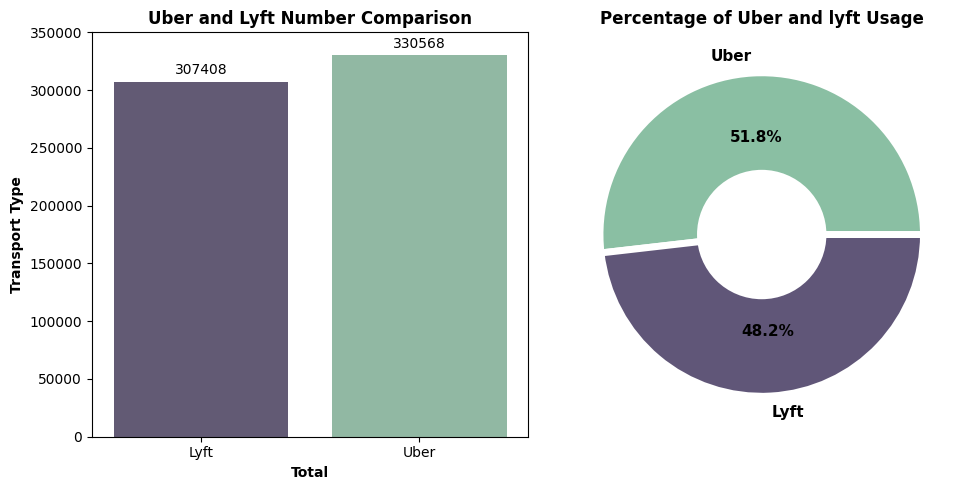

In [194]:
# Membuat 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Membuat subplot 1: Bar Plot
transport_type = sns.countplot(x='cab_type', 
                             data=data, 
                             palette=['#605678', '#8ABFA3'],
                             ax = ax1
                             )

# Menambahkan keterangan jumlah pada setiap batang
for p in transport_type.patches:
    ax1.annotate(int(p.get_height()),
                (p.get_x() + p.get_width()/2.,p.get_height()),
                ha = 'center',
                va = 'center',
                textcoords='offset points',
                xytext = (0,8)
               )

# Mengatur judul, label sumbu X dan Y
ax1.set_title('Uber and Lyft Number Comparison', 
          fontweight='bold',
          fontsize=12)
ax1.set_ylabel('Transport Type', 
           fontweight='bold')
ax1.set_xlabel('Total',
           fontweight='bold')

# Mengatur batas sumbu y
ax1.set_ylim(0, 350000)

# Menambahkan batas (spines)
ax1.spines['top'].set_visible(True)  # Menampilkan batas atas
ax1.spines['right'].set_visible(True)  # Menampilkan batas kanan


# Membuat subplots 2: Pie Chart
# Menghitung jumlah kategori kendaraan
transport_type_count = data['cab_type'].value_counts()

# Membuat pie chart
ax2.pie(
    transport_type_count,
    labels=transport_type_count.index,
    textprops={'fontweight': 'bold', 'fontsize': 11},
    autopct='%1.1f%%',
    startangle=0,
    colors=['#8ABFA3', '#605678'],
    wedgeprops={'linewidth' : 5, 'edgecolor' : 'white'}
)

centre_circle = plt.Circle((0, 0), 0.4, fc = 'white')
ax2.add_artist(centre_circle)

# Mengatur judul dan label 
ax2.set_title('Percentage of Uber and lyft Usage', 
          fontweight='bold',
          fontsize=12)

# Mengatur tata letak plot
plt.tight_layout()
plt.show()

Berdasarkan plot yang dihasilkan dari data, terlihat bahwa jumlah penggunaan layanan Uber lebih tinggi dibandingkan dengan layanan Lyft. Layanan Uber digunakan oleh 51% dari total pengguna, yaitu sebanyak 330.568 pengguna, sementara layanan Lyft digunakan oleh 48,2% dari total pengguna, yaitu 307.408 pengguna. Perbedaan jumlah pengguna antara Uber dan Lyft adalah 23.160.

In [195]:
avg_price = data.groupby(data["cab_type"])["price"].mean().reset_index(name="Average Price")
avg_price

,cab_type,Average Price
0,Lyft,17.351396
1,Uber,15.795343


Salah satu faktor yang menyebabkan jumlah pengguna layanan Uber lebih banyak dibandingkan Lyft adalah perbedaan harga, di mana Uber menawarkan tarif yang lebih murah. Rata-rata harga untuk Lyft adalah 17.35, sedangkan Uber memiliki rata-rata harga sebesar 15.80. Selisih harga rata-rata antara Uber dan Lyft adalah sebesar 1.55

#### 2. How Uber and Lyft usage is distributed in 24 hours?

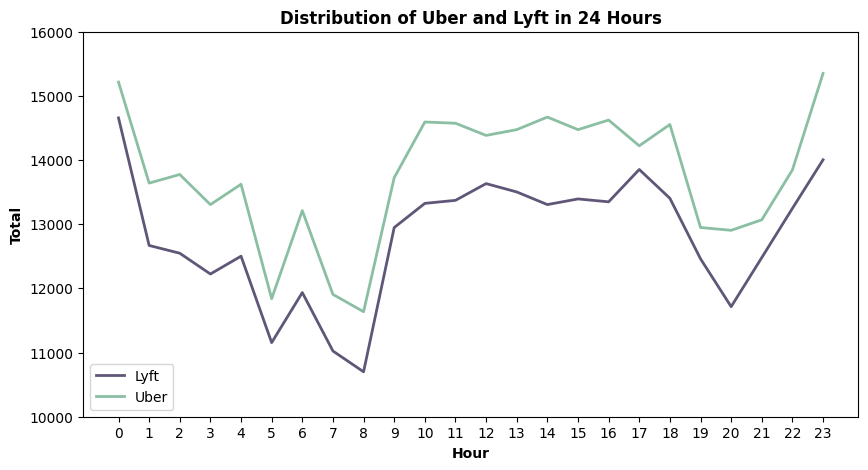

In [196]:
fig, ax = plt.subplots(figsize=(10, 5))

# Menghitung jumlah perjalanan setiap jam untuk Lyft dan Uber
lyft_count = data[data['cab_type'] == "Lyft"].groupby("hour").hour.count()
uber_count = data[data['cab_type'] == "Uber"].groupby("hour").hour.count()

# Membuat plot data 
ax.plot(lyft_count.index, 
        lyft_count, 
        label="Lyft",
        color= '#605678',
        linewidth=2,)
ax.plot(uber_count.index, 
        uber_count, 
        label="Uber",
        color='#8ABFA3',
        linewidth=2)

# Menambahkan legenda
ax.legend()

# Mengatur judul dan label
plt.xlabel("Hour", fontweight="bold") 
plt.ylabel("Total", fontweight="bold")
plt.title("Distribution of Uber and Lyft in 24 Hours", 
          fontweight="bold",
          fontsize=12)

plt.xticks(range(0, 24, 1))
plt.yticks(range(10000, 17000, 1000))
plt.show()

Pengguna seringkali menggunakan layanan Uber dan Lyft pada jam 00.00 dan penggunaanya sepi pada pukul 08.00. Penggunaan layanan mulai stabil pada pukul 10.00 hingga 18.00

#### 3. How is the correlation between price and distance?

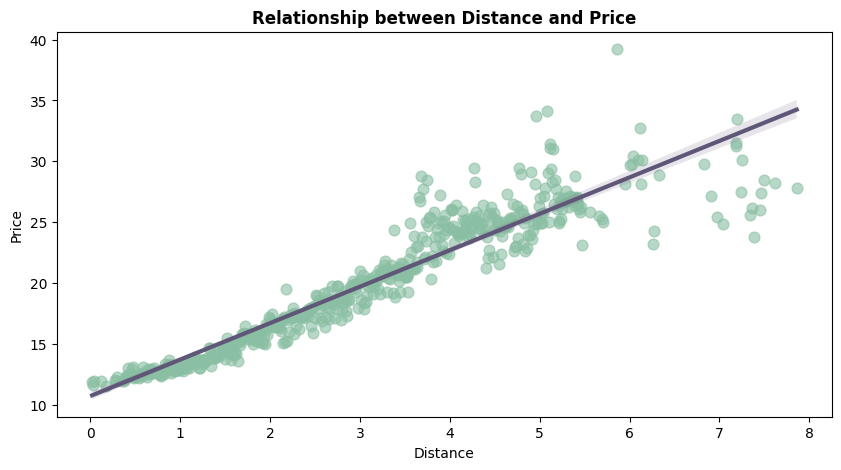

In [197]:
# Mengelompokkan data berdasarkan distance
distances = data.groupby("distance")["price"].mean()

# Mengatur ukuran plot
plt.figure(figsize=(10, 5))

# Membuat scatter plot dengan garis regresi
sns.regplot(x=distances.index,
            y=distances,
            scatter=True,
            color='#605678',
            scatter_kws={'color': '#8ABFA3', 's': 60, 'alpha': 0.6},
            line_kws={'linewidth': 3})

# Mengatur judul dan label
plt.xlabel("Distance") 
plt.ylabel("Price")
plt.title("Relationship between Distance and Price", 
          fontweight="bold",
          fontsize=12)

plt.show()

Dari scatter plot di atas, terlihat bahwa rata-rata harga layanan Uber dan Lyft cenderung meningkat seiring dengan bertambahnya jarak tempuh perjalanan. Titik-titik yang mendekati garis menunjukkan adanya hubungan yang konsisten antara harga dan jarak tempuh perjalanan. Namun, terdapat juga beberapa titik yang tersebar jauh dari garis regresi. Hal ini menunjukkan adanya keadaan tidak biasa antara harga dan jarak tempuh perjalanan. Penyebab dari outliers ini bisa beragam, seperti diskon, promosi, tipe mobil atau kondisi tertentu lainnya.

#### 4. Which source and destination have the highest prices?

In [198]:
# Mencari variabel dengan tarif tertinggi
print(f"Tarif tertinggi layanan adalah ", data.price.max())
data[data["price"] == data.price.max()]

Tarif tertinggi layanan adalah  97.5


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
597071,ba1593a1-e4fd-4c7a-a011-e2d4fccbf081,1.543714e+09,1,2,12,2018-12-02 01:28:02,America/New_York,Financial District,Fenway,Lyft,...,0.0,1543683600,31.57,1543665600,44.65,1543690800,28.1,1543658400,43.98,1543690800


In [199]:
# Mencari tata letak wilayah source dan destion 
data[data["price"] == data.price.max()][["latitude", "longitude"]]

,latitude,longitude
597071,42.3503,-71.081


In [200]:
price_map = folium.Map(location=(42.3503, -71.081), zoom_start=14)

folium.Marker(location = (42.3503,-71.081),
              popup = "Location 1: Destination Area",
              icon = folium.Icon(color='green', icon='info-sign')
              ).add_to(price_map)

folium.Marker(location=(42.3378,-71.066),
              popup = "Location 2: Source Area",
              icon = folium.Icon(color='darkblue', icon='info-sign')
              ).add_to(price_map)

display(price_map)

Dari hasil yang ditampilkan, terlihat bahwa tarif tertinggi didapatkan dari penggunaan layanan Lyft dengan source Financial District dan destination Fenway yaitu sebesar 97.5

### Feature Engineering

In [201]:
# Membuat list yang berisi beberapa variabel yang berkaitan dengan temperatur
temp_col = ['temperature','apparentTemperature',  'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'price']

In [202]:
# Membuat dataframe yang berisi variabel yang berkaitan dengan temperature 
data_temp = data[temp_col]
data_temp.head()

,temperature,apparentTemperature,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,price
0,42.34,37.12,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,5.0
1,43.58,37.35,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,11.0
2,38.33,32.93,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,7.0
3,34.38,29.63,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,26.0
4,37.44,30.88,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,9.0


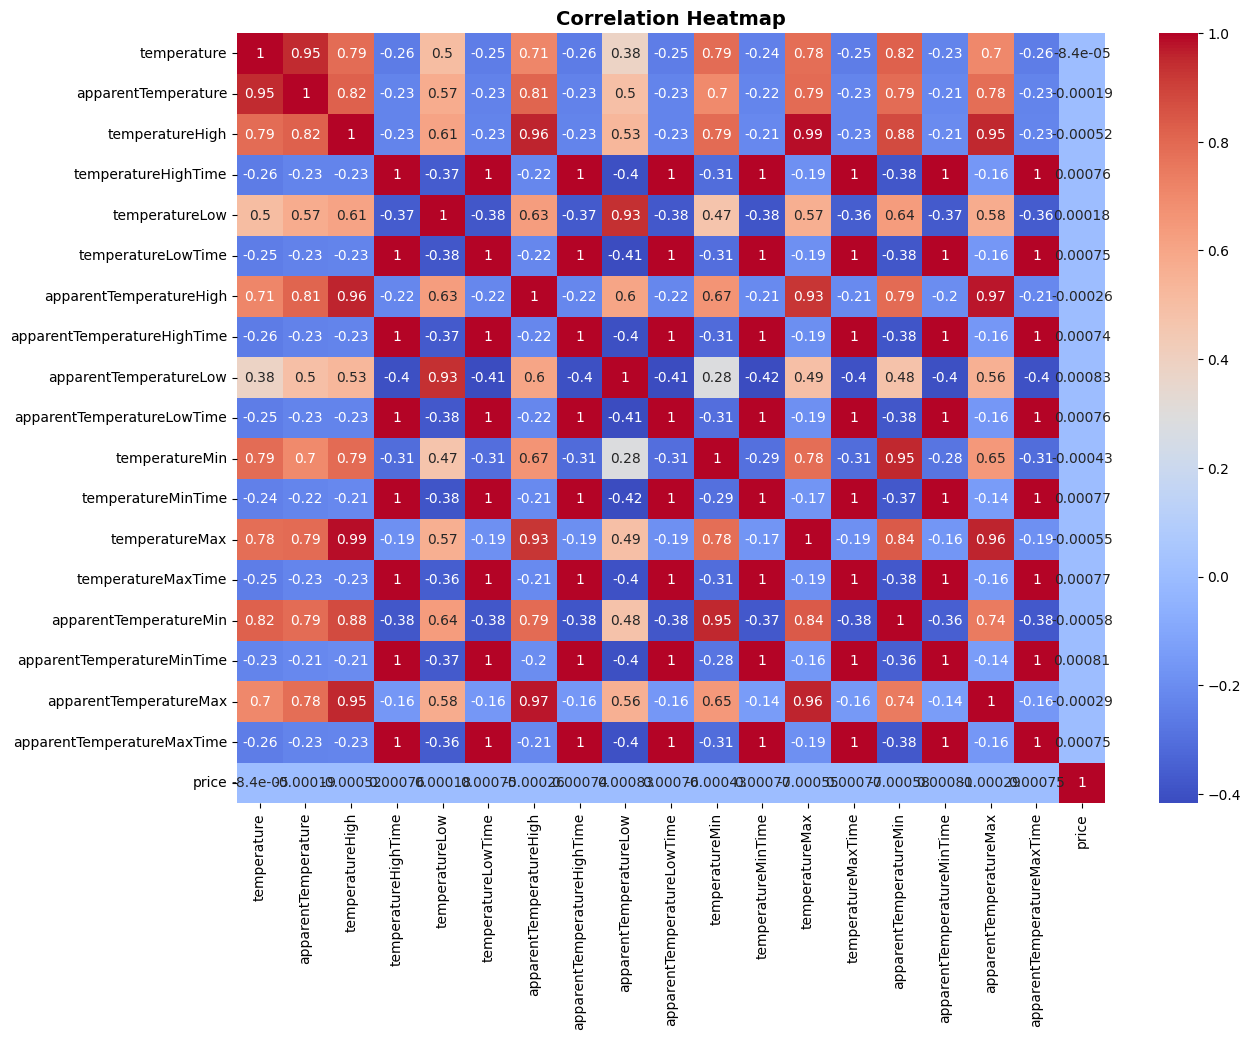

In [203]:
# Menampilkan correlation map untuk menunjukkan korelasi antar variabel terhadap variabel target
plt.figure(figsize=(14, 10))
sns.heatmap(data_temp.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap", fontweight="bold", fontsize=14)
plt.show()

In [204]:
# Menghapus beberapa variabel yang berkaitan dengan temperatur karena kurang memiliki relevansi terhadap variabel target
data.drop(['apparentTemperature',  'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime'
       ], axis=1 , inplace=True)


Dari analisis di atas, beberapa variabel yang berkaitan dengan suhu berkorelasi rendah variabel target, yaitu 'price' sehingga dilakukan drop pada beberapa kolom karena variabel 'short_summary' dan 'temperature 'sudah mewakilkan beberapa variabel suhu

In [205]:
# Menampilkan informasi dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 40 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  637976 non-null  object        
 1   timestamp           637976 non-null  float64       
 2   hour                637976 non-null  int64         
 3   day                 637976 non-null  int64         
 4   month               637976 non-null  int64         
 5   datetime            637976 non-null  datetime64[ns]
 6   timezone            637976 non-null  object        
 7   source              637976 non-null  object        
 8   destination         637976 non-null  object        
 9   cab_type            637976 non-null  object        
 10  product_id          637976 non-null  object        
 11  name                637976 non-null  object        
 12  price               637976 non-null  float64       
 13  distance            637976 no

In [206]:
#membuat variabel yang nantinya digunakan untuk menyimpan nilai modeling dengan  tipe objek dan kategori yang akan dirubah menjadi list
nilai_variabel = data.select_dtypes(include=['object', 'category']).columns.tolist()

for column in data[nilai_variabel]:
    print(f'{column} : {data[column].unique()}')
    print()

id : ['424553bb-7174-41ea-aeb4-fe06d4f4b9d7'
 '4bd23055-6827-41c6-b23b-3c491f24e74d'
 '981a3613-77af-4620-a42a-0c0866077d1e' ...
 '633a3fc3-1f86-4b9e-9d48-2b7132112341'
 '727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e'
 'e7fdc087-fe86-40a5-a3c3-3b2a8badcbda']

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-b

In [207]:
# Menghapus variabel yang kurang memiliki relevansi terhadap variabel target
data.drop(['id', 'timestamp', 
           'datetime', 'timezone', 
           'product_id', 'latitude', 
           'longitude', 'long_summary', 
           'precipIntensity', 'precipProbability', 
           'windGust', 'windGustTime', 'pressure', 
           'windBearing', 'cloudCover', 
           'visibility.1', 'ozone', 
           'sunriseTime', 'sunsetTime', 'moonPhase',
           'precipIntensityMax', 'uvIndexTime',
           ], axis=1, inplace=True)

Menghapus beberapa variabel yang kurang berpengaruh 
- varibel'id' karena hanya berisi kode unik pemesanan
- variabel 'timestamp' karena merupakan jumlah detik
- variabel 'datetime' karena sudah terwakilkan oleh variabel 'hour', 'day', dan 'month',
- variabel 'timezone' karena hanya memiliki satu nilai yang sama, yaitu 'America/New_York'
- variabel 'product_id' tidak dapat digunakan karena pada 'cab_type' Uber, layanannya dienkripsi
- variabel 'latitude', 'longitude' karena sudah terwakilkan oleh variabel 'distance'
- variabel 'long_summary', 'precipIntensity', 'precipProbability','windGust', 'windGustTime', 'pressure', 'windBearing', 'cloudCover', 'uvIndex','visibility.1', 'precipIntensityMax' karena informasi mengenai cuaca sudah terangkum dalam variabel 'short_summary'
- variabel 'sunriseTime', 'sunsetTime', 'moonPhase' 'ozone', dan 'uvIndexTime' dinilai kurang relevan untuk digunakan sebagai variabel dalam memprediksi harga taxi

In [208]:
data.columns

Index(['hour', 'day', 'month', 'source', 'destination', 'cab_type', 'name',
       'price', 'distance', 'surge_multiplier', 'temperature', 'short_summary',
       'humidity', 'windSpeed', 'visibility', 'icon', 'dewPoint', 'uvIndex'],
      dtype='object')

In [209]:
# Menyalin dataframe untuk encoding
data_encode = data.copy()

# Melakukan Label Encoding untuk semua kolom bertipe 'object'
for column in data_encode.select_dtypes(include='O').columns:
    le = preprocessing.LabelEncoder() 
    data_encode[column] = le.fit_transform(data_encode[column])


In [210]:
data_encode

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,short_summary,humidity,windSpeed,visibility,icon,dewPoint,uvIndex
0,9,16,12,5,7,0,7,5.0,0.44,1.0,42.34,4,0.68,8.66,10.000,5,32.70,0
1,2,27,11,5,7,0,2,11.0,0.44,1.0,43.58,8,0.94,11.98,4.786,6,41.83,0
2,1,28,11,5,7,0,5,7.0,0.44,1.0,38.33,0,0.75,7.33,10.000,1,31.10,0
3,4,30,11,5,7,0,4,26.0,0.44,1.0,34.38,0,0.73,5.28,10.000,1,26.64,0
4,3,29,11,5,7,0,6,9.0,0.44,1.0,37.44,6,0.70,9.14,10.000,5,28.61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,23,1,12,11,6,1,11,9.5,1.00,1.0,37.05,6,0.74,2.34,9.785,5,29.65,0
693066,23,1,12,11,6,1,10,13.0,1.00,1.0,37.05,6,0.74,2.34,9.785,5,29.65,0
693067,23,1,12,11,6,1,9,9.5,1.00,1.0,37.05,6,0.74,2.34,9.785,5,29.65,0
693069,23,1,12,11,6,1,1,27.0,1.00,1.0,37.05,6,0.74,2.34,9.785,5,29.65,0


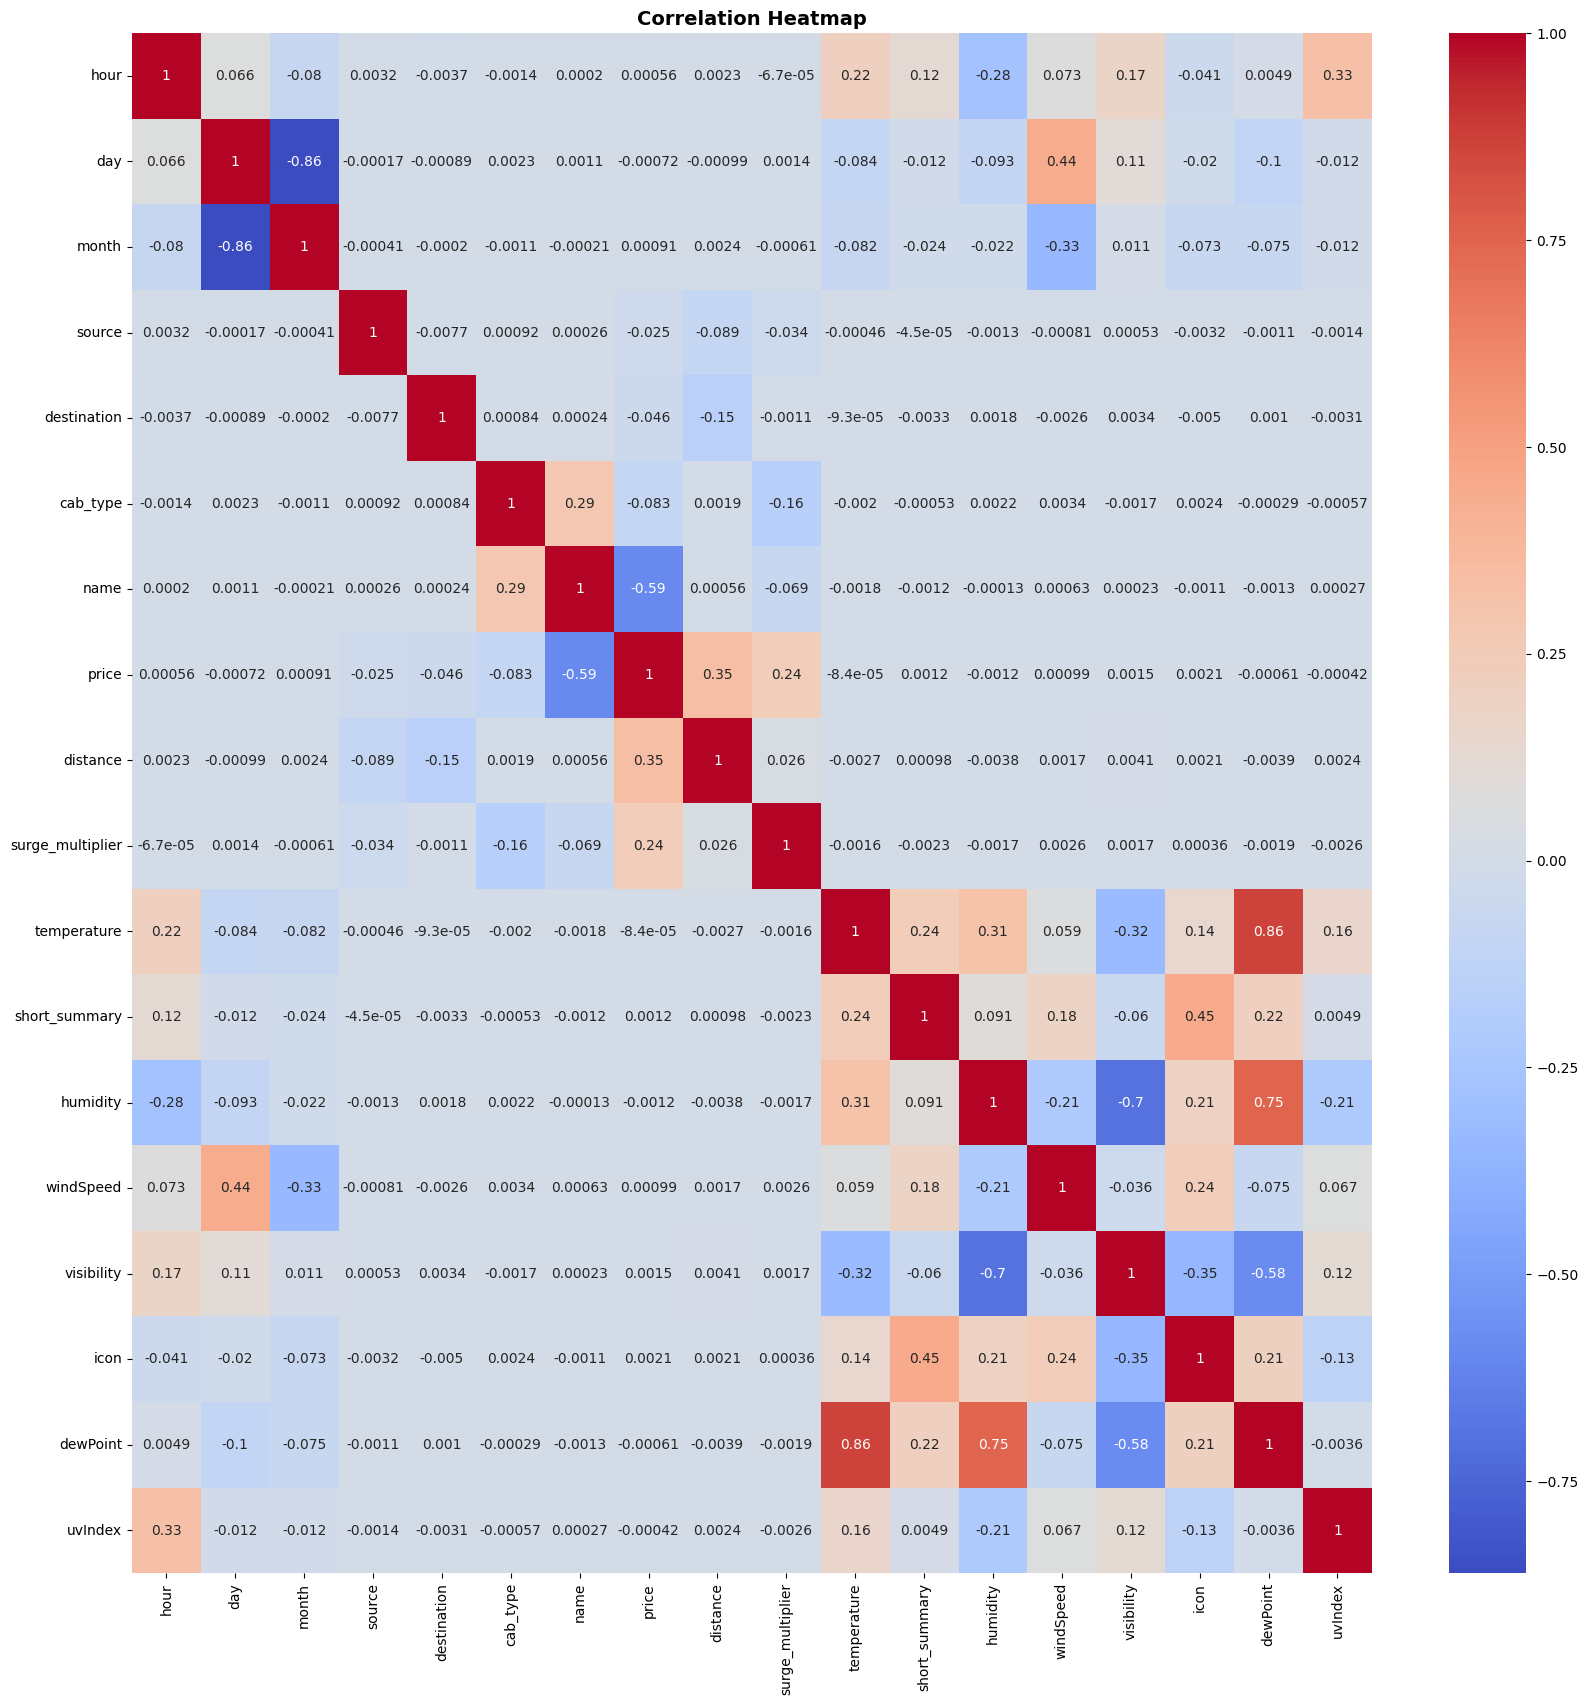

In [211]:
# Membuat heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(data_encode.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap", fontweight="bold", fontsize=14)
plt.show()

Berdasarkan hasil heatmap di atas, terdapat variabel yang memiliki korelasi negatif terdapat variabel target 'price', yaitu variabel 'temperature', 'humidity', 'windSpeed', 'visibility','icon', 'dewPoint', 'uvIndex', 'source', dan 'destination' sehingga variabel lebih baik dihapus dari dataset.

In [212]:
# Menghapus variabel yang kurang memiliki relevansi terhadap variabel target
data.drop(['temperature', 'humidity', 'windSpeed', 'visibility','icon', 'dewPoint', 'uvIndex', 'source', 'destination'
           ], axis=1, inplace=True)

data_encode.drop(['temperature', 'humidity', 'windSpeed', 'visibility','icon', 'dewPoint', 'uvIndex', 'source', 'destination'
           ], axis=1, inplace=True)

In [213]:
data.columns

Index(['hour', 'day', 'month', 'cab_type', 'name', 'price', 'distance',
       'surge_multiplier', 'short_summary'],
      dtype='object')

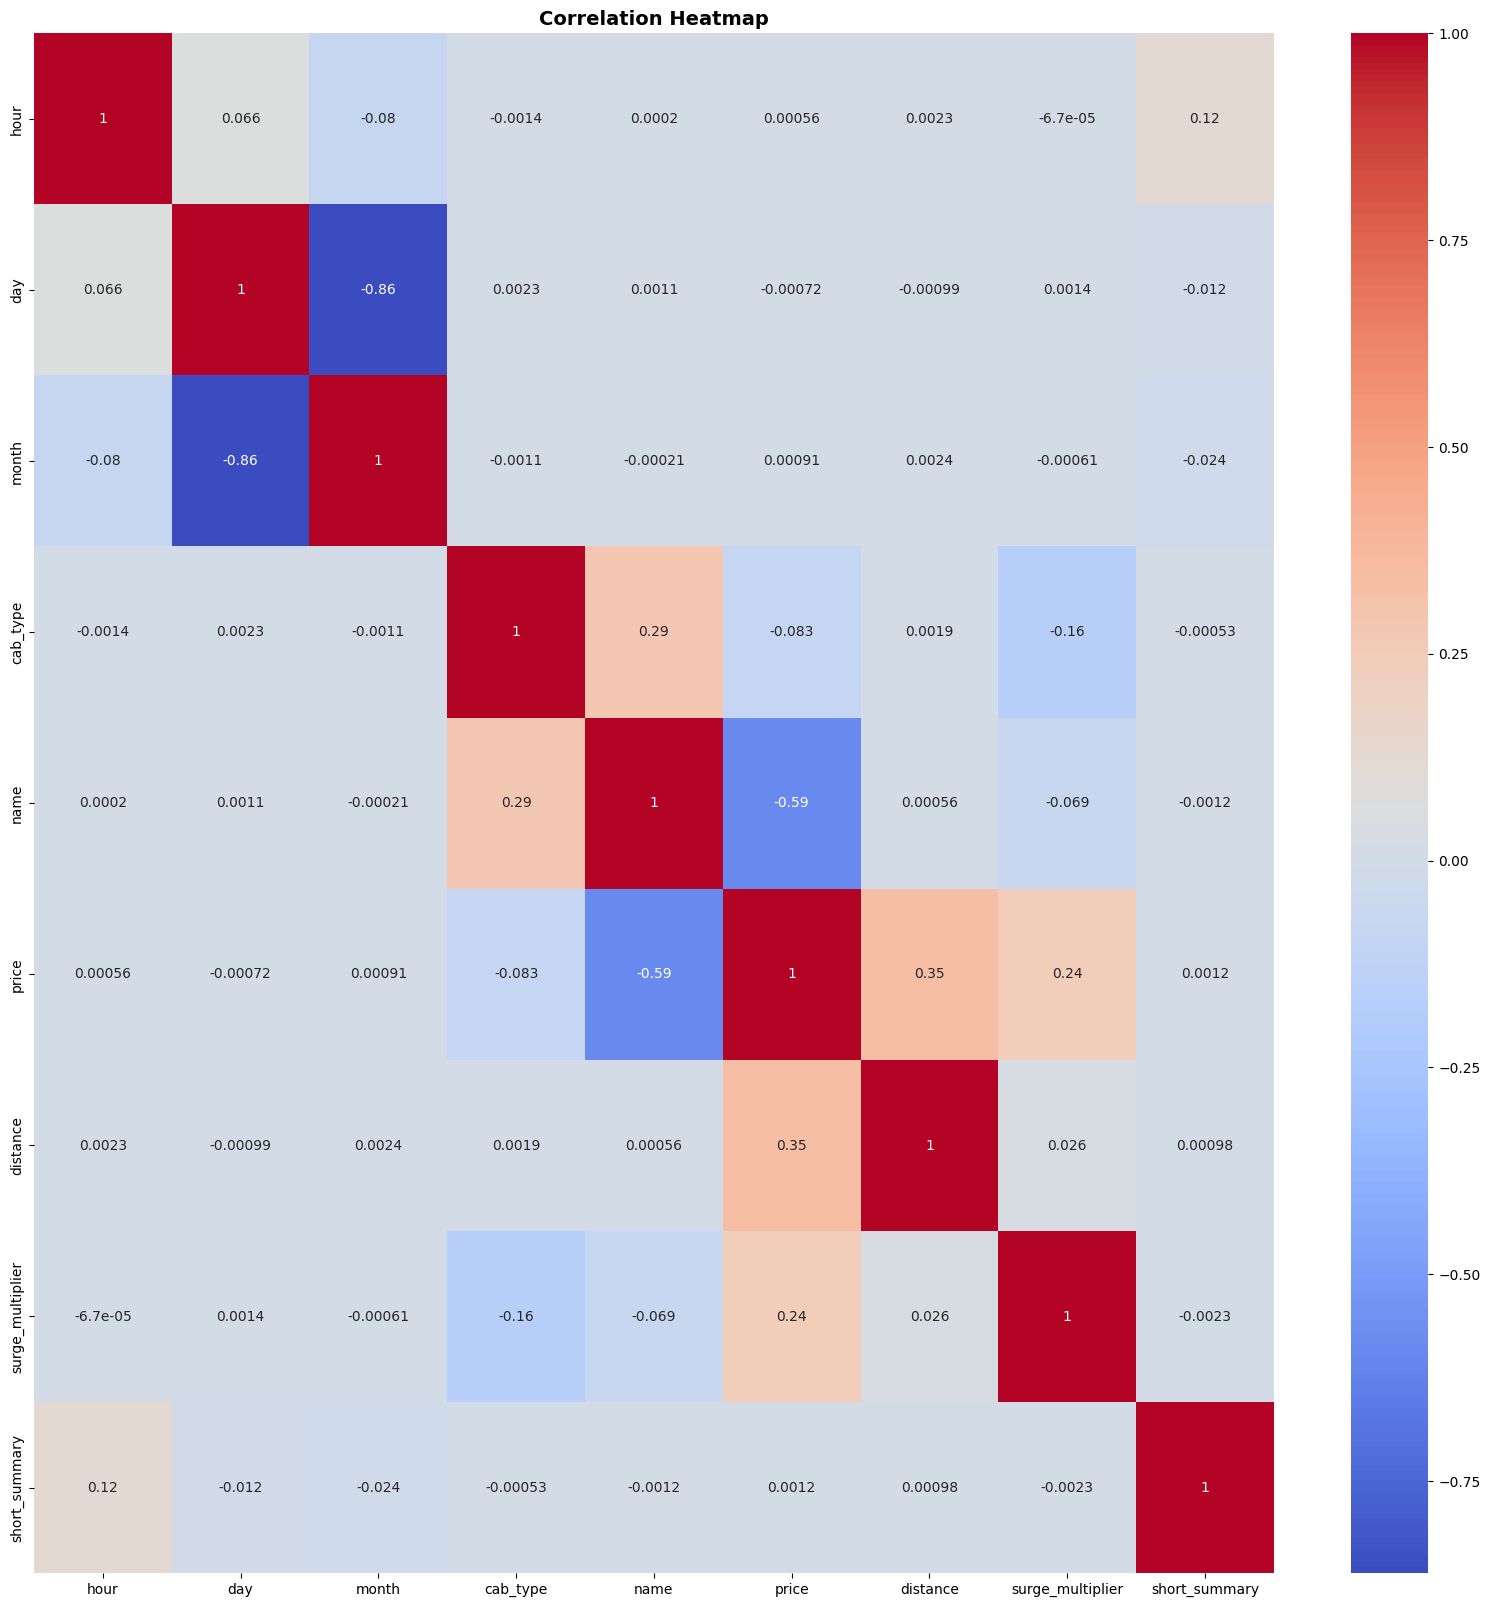

In [214]:
# Membuat heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(data_encode.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap", fontweight="bold", fontsize=14)
plt.show()

#### One Hot Encoding

In [215]:
# Menyalin dataframe data_encode menjadi data_onehot_encode
data_onehot_encode = data.copy()
data_onehot_encode

,hour,day,month,cab_type,name,price,distance,surge_multiplier,short_summary
0,9,16,12,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy
1,2,27,11,Lyft,Lux,11.0,0.44,1.0,Rain
2,1,28,11,Lyft,Lyft,7.0,0.44,1.0,Clear
3,4,30,11,Lyft,Lux Black XL,26.0,0.44,1.0,Clear
4,3,29,11,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy
...,...,...,...,...,...,...,...,...,...
693065,23,1,12,Uber,WAV,9.5,1.00,1.0,Partly Cloudy
693066,23,1,12,Uber,UberXL,13.0,1.00,1.0,Partly Cloudy
693067,23,1,12,Uber,UberX,9.5,1.00,1.0,Partly Cloudy
693069,23,1,12,Uber,Black SUV,27.0,1.00,1.0,Partly Cloudy


In [216]:
def one_hot_encoder(data, feature, keep_first=True):
    # Melakukan one-hot encoding pada fitur yang diberikan
    one_hot_cols = pd.get_dummies(data[feature])
    
    # Mengganti nama setiap kolom dalam DataFrame one_hot_cols
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col}, axis=1, inplace=True)
    
    # Menggabungkan DataFrame one_hot_cols dengan dataset data
    new_data = pd.concat([data, one_hot_cols], axis=1)
    # Menghapus fitur yang telah diencode
    new_data.drop(feature, axis=1, inplace=True)
    
    # Jika keep_first di set sebagai False, maka fitur pertama akan dihapus dari hasil encoding
    if keep_first == False:
        new_data = new_data.iloc[:, 1:]
    
    return new_data

In [217]:
# Menyalin dataframe data_encode menjadi data_onehot_encode

# Looping untuk setiap kolom yang memiliki tipe data object (string)
for col in data_onehot_encode.select_dtypes(include='O').columns:
    # Menggunakan fungsi one_hot_encoder untuk melakukan one-hot encoding pada kolom tersebut
    data_onehot_encode = one_hot_encoder(data_onehot_encode, col)

# Menampilkan dataframe data_onehot_encode
data_onehot_encode.head()

,hour,day,month,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,...,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
0,9,16,12,5.0,0.44,1.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,27,11,11.0,0.44,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,28,11,7.0,0.44,1.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,4,30,11,26.0,0.44,1.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,3,29,11,9.0,0.44,1.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Skenario 1: menggunakan Label Encoding

In [218]:
# Mendeteksi outlier pada data
Q1 = data_encode['price'].quantile(0.25)
Q3 = data_encode['price'].quantile(0.75)
IQR = Q3-Q1
print("Nilai Kuartil 1 : " ,Q1)
print("Nilai Kuartil 3 : " ,Q3)
print("Nilai Rentang : " ,IQR)

Nilai Kuartil 1 :  9.0
Nilai Kuartil 3 :  22.5
Nilai Rentang :  13.5


<Axes: >

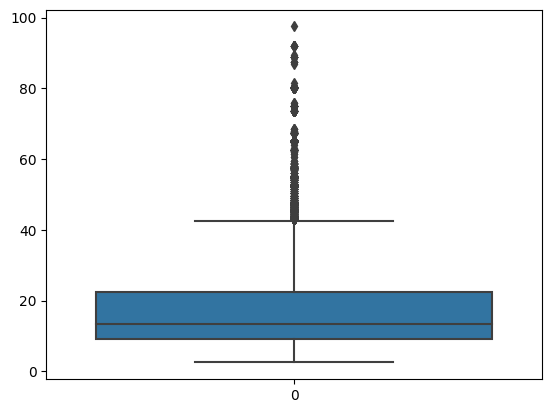

In [219]:
# Membuat boxplot
sns.boxplot(data_encode['price'])

In [220]:
# Melakukan filtering pada dataframe data encode untuk mendeteksi outlier 
data_encode[data_encode['price'] > (Q3 + (1.5 * IQR))]

,hour,day,month,cab_type,name,price,distance,surge_multiplier,short_summary
706,10,28,11,0,3,52.5,3.25,2.00,6
707,2,16,12,0,4,67.5,3.25,2.00,6
769,17,14,12,0,4,45.5,4.76,1.00,6
1094,17,2,12,0,4,45.5,4.31,1.00,3
1318,16,16,12,0,4,45.5,5.33,1.00,5
...,...,...,...,...,...,...,...,...,...
692439,20,17,12,1,1,47.0,5.56,1.00,4
692698,10,14,12,0,4,52.5,4.58,1.25,6
692891,5,3,12,0,4,47.5,5.42,1.00,2
692962,4,2,12,1,1,51.0,7.36,1.00,4


In [221]:
# Melakukan filtering pada dataframe data encode untuk mendeteksi outlier 
data_encode[data_encode['price'] < (Q1 - (1.5 * IQR))]

,hour,day,month,cab_type,name,price,distance,surge_multiplier,short_summary


In [222]:
print(f"Data sebelum dihilangkan outliernya: {data_encode.shape}")

# Melakukan filtering outlier pada variabel 'price'
data_encode= data_encode[~((data_encode['price']>(Q3+(1.5*IQR))))]
print(f"Data setelah dihilangkan outlierya: {data_encode.shape}")

Data sebelum dihilangkan outliernya: (637976, 9)
Data setelah dihilangkan outlierya: (632387, 9)


<Axes: >

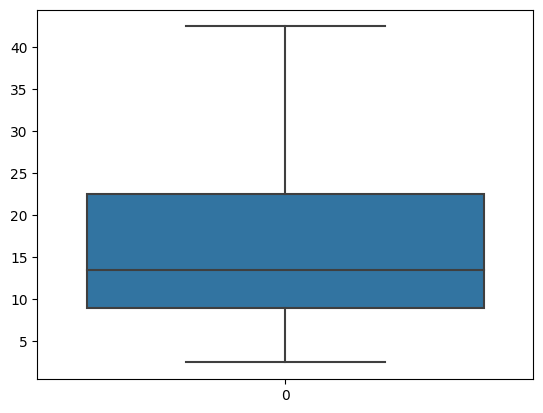

In [223]:
# Membuat boxplot
sns.boxplot(data_encode['price'])

### Modeling

In [224]:
# Membuat array yang akan digunakan sebagai fitur independen
X = data_encode.drop(columns='price', axis=1).values

# Membuat array sebagai nilai target
y = data_encode['price'].values

In [225]:
# Membagi dataset menjadi data latih dan data uji
X_train1, X_test1, y_train1, y_test1= train_test_split(X, y, test_size=0.4, random_state=0)

In [226]:
# Membuat model regresi linear
model = LinearRegression()
model = model.fit(X_train1, y_train1)

In [227]:
# Memprediksi data uji
y_pred1 = model.predict(X_test1)
y_pred1

array([26.93118638, 23.53697959, 14.73727654, ..., 14.90121564,
       19.57453872, 25.72208313])

In [228]:
# Mengukur akurasi model dengan MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test1, y_pred1)
print(mae)

5.01252034167239


In [229]:
# Mengukur akurasi model dengan r2
from sklearn.metrics import r2_score

r2 = r2_score(y_test1, y_pred1)
print("R-squared:", r2)


R-squared: 0.4972109836666394


In [230]:
from sklearn.model_selection import GridSearchCV

param_grid = {'fit_intercept': [True, False]}
grid = GridSearchCV(LinearRegression(), param_grid, cv=5)
grid.fit(X_train1, y_train1)
print("Best parameters:", grid.best_params_)

Best parameters: {'fit_intercept': True}


In [231]:
coef = model.coef_
intercept = model.intercept_
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: 4.823386632839181
slope: [ 1.24584832e-03  1.43980483e-03  4.44732274e-02  2.34003997e+00
 -1.60745367e+00  2.54610382e+00  1.28884262e+01 -5.17319158e-04]


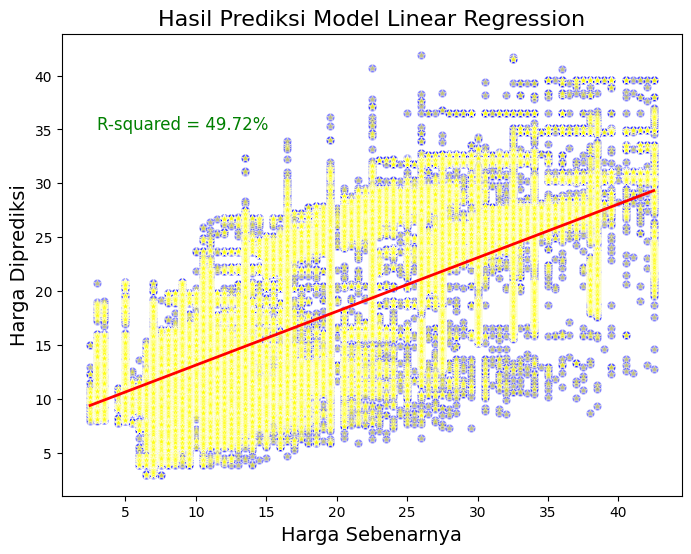

In [232]:
condition = (y_test1 < 50) # kondisi untuk subset pertama
subset1_x = y_test1
subset1_y = y_pred1

subset2_x = y_test1
subset2_y = y_pred1

# Buat scatter plot untuk setiap subset dengan marker yang berbeda
plt.figure(figsize=(8,6))
sns.scatterplot(x=subset1_x, y=subset1_y, color='blue', alpha=0.5, marker='o')
sns.scatterplot(x=subset2_x, y=subset2_y, color='yellow', alpha=0.5, marker='*')

# Menambahkan garis regresi untuk seluruh data
sns.regplot(x=y_test1, y=y_pred1, color='red', scatter=False, line_kws={'lw':2})

plt.title('Hasil Prediksi Model Linear Regression', fontsize=16)
plt.xlabel('Harga Sebenarnya', fontsize=14)
plt.ylabel('Harga Diprediksi', fontsize=14)

# Menambahkan anotasi
plt.text(3, 35, f'R-squared = {round(r2_score(y_test1, y_pred1)*100, 2)}%', fontsize=12, color='green')

plt.show()

#### Skenario 2: menggunakan One Hot Encoding

In [233]:
# Mendeteksi outlier pada data
Q1 = data_onehot_encode['price'].quantile(0.25)
Q3 = data_onehot_encode['price'].quantile(0.75)
IQR = Q3-Q1
print("Nilai Kuartil 1 : " ,Q1)
print("Nilai Kuartil 3 : " ,Q3)
print("Nilai Rentang : " ,IQR)

Nilai Kuartil 1 :  9.0
Nilai Kuartil 3 :  22.5
Nilai Rentang :  13.5


<Axes: >

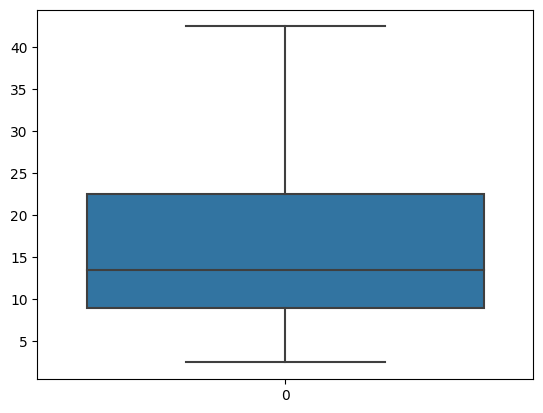

In [234]:
# Membuat boxplot
sns.boxplot(data_encode['price'])

In [235]:
# Melakukan filtering pada dataframe data encode untuk mendeteksi outlier 
data_onehot_encode[data_onehot_encode['price'] > (Q3 + (1.5 * IQR))]

,hour,day,month,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,...,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
706,10,28,11,52.5,3.25,2.00,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
707,2,16,12,67.5,3.25,2.00,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
769,17,14,12,45.5,4.76,1.00,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1094,17,2,12,45.5,4.31,1.00,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1318,16,16,12,45.5,5.33,1.00,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692439,20,17,12,47.0,5.56,1.00,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
692698,10,14,12,52.5,4.58,1.25,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
692891,5,3,12,47.5,5.42,1.00,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
692962,4,2,12,51.0,7.36,1.00,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


In [236]:
# Melakukan filtering pada dataframe data encode untuk mendeteksi outlier 
data_onehot_encode[data_onehot_encode['price'] < (Q1 - (1.5 * IQR))]

,hour,day,month,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,...,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain


In [237]:
print(f"Data sebelum dihilangkan outliernya: {data_onehot_encode.shape}")

# Melakukan filtering outlier pada variabel 'price'
data_onehot_encode= data_onehot_encode[~((data_onehot_encode['price']>(Q3+(1.5*IQR))))]
print(f"Data setelah dihilangkan outlierya: {data_encode.shape}")

Data sebelum dihilangkan outliernya: (637976, 29)
Data setelah dihilangkan outlierya: (632387, 9)


<Axes: >

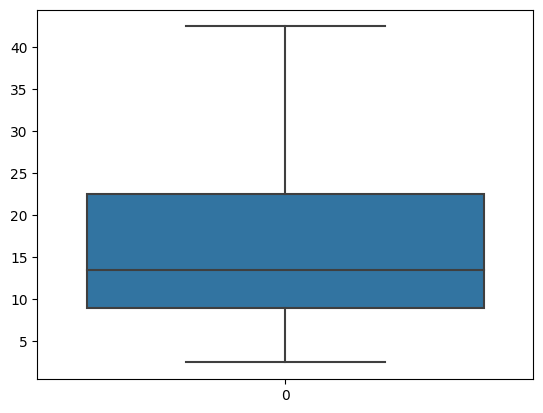

In [238]:
sns.boxplot(data_onehot_encode['price'])

### Modeling

In [239]:
# Membuat array yang akan digunakan sebagai fitur independen
X = data_onehot_encode.drop(columns='price', axis=1).values

# Membuat array sebagai nilai target
y = data_onehot_encode['price'].values

In [240]:
# Membagi dataset menjadi data latih dan data uji
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=0)

In [241]:
# Membuat model regresi linear
model_OH = LinearRegression()
model_OH = model_OH.fit(X_train2, y_train2)

In [242]:
# Memprediksi data uji
y_pred2 = model_OH.predict(X_test2)
y_pred2

array([30.69793667, 37.49166596,  8.28192219, ..., 13.08432157,
        9.10088027, 15.44787732])

In [243]:
# Mengukur akurasi model dengan MAE
mae = mean_absolute_error(y_test2, y_pred2)
print(mae)

1.6759504596301482


In [244]:
# Mengukur akurasi model dengan r2
r2 = r2_score(y_test2, y_pred2)
print("R-squared:", r2)


R-squared: 0.9337806585535104


In [245]:
from sklearn.model_selection import GridSearchCV

param_grid = {'fit_intercept': [True, False]}
grid = GridSearchCV(LinearRegression(), param_grid, cv=5)
grid.fit(X_train2, y_train2)
print("Best parameters:", grid.best_params_)

Best parameters: {'fit_intercept': False}


In [246]:
coef = model_OH.coef_
intercept = model_OH.intercept_
print(f'intercept: {model_OH.intercept_}')
print(f'slope: {model_OH.coef_}')

intercept: -3.25038777249506
slope: [ 3.99878011e-04 -2.34112964e-04  1.91334918e-03  2.66633850e+00
  1.36590431e+01  4.39444945e-01 -4.39444945e-01  4.67727055e+00
  1.42662971e+01  5.41819883e-01  5.70298435e+00  1.43524507e+01
 -7.59664288e+00 -1.91126055e+00 -1.06499065e+01 -7.07571823e+00
 -6.05840935e+00 -1.88396966e-01 -6.06048806e+00 -1.64910426e-02
  5.37526168e-02  4.49806616e-03 -9.19719086e-03 -5.63177085e-03
 -2.09417926e-02 -3.81024898e-03  2.66899288e-04 -2.44553643e-03]


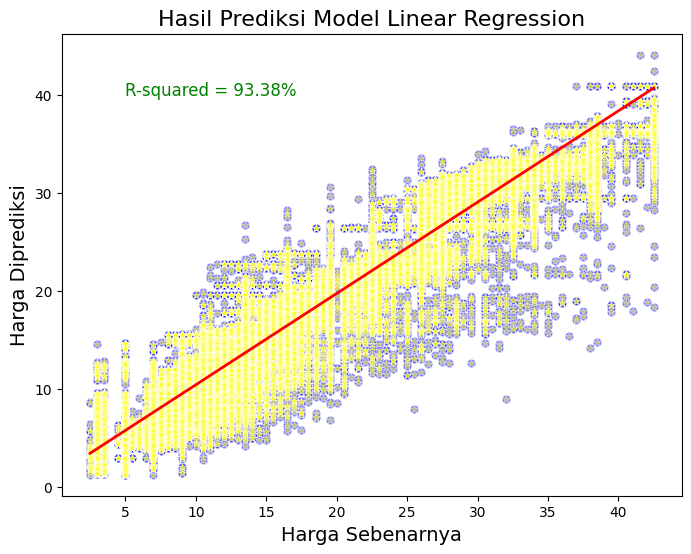

In [247]:
condition = (y_test2 < 50) # kondisi untuk subset pertama
subset1_x = y_test2
subset1_y = y_pred2

subset2_x = y_test2
subset2_y = y_pred2

# Buat scatter plot untuk setiap subset dengan marker yang berbeda
plt.figure(figsize=(8,6))
sns.scatterplot(x=subset1_x, y=subset1_y, color='blue', alpha=0.5, marker='o')
sns.scatterplot(x=subset2_x, y=subset2_y, color='yellow', alpha=0.5, marker='*')

# Menambahkan garis regresi untuk seluruh data
sns.regplot(x=y_test2, y=y_pred2, color='red', scatter=False, line_kws={'lw':2})

plt.title('Hasil Prediksi Model Linear Regression', fontsize=16)
plt.xlabel('Harga Sebenarnya', fontsize=14)
plt.ylabel('Harga Diprediksi', fontsize=14)

# Menambahkan anotasi
plt.text(5, 40, f'R-squared = {round(r2_score(y_test2, y_pred2)*100, 2)}%', fontsize=12, color='green')

plt.show()

### Model Inference

In [248]:
import pandas as pd

# Data yang diperbarui
test_ = {
    'hour': [12, 6, 5],
    'day': [15, 16, 17],
    'month': [1, 2, 3],
    # 'price': [25.5, 30.0, 28.5],
    'distance': [5, 55, 20],
    'surge_multiplier': [1, 1, 2],
    
    # cab_type columns (one-hot encoded)
    'cab_type_Lyft': [0, 1, 0],
    'cab_type_Uber': [1, 0, 1],
    
    # name columns (one-hot encoded)
    'name_Black': [0, 0, 0],
    'name_Black SUV': [0, 0, 0],
    'name_Lux': [0, 0, 0],
    'name_Lux Black': [0, 0, 0],
    'name_Lux Black XL': [0, 0, 0],
    'name_Lyft': [1, 0, 0],
    'name_Lyft XL': [0, 1, 0],
    'name_Shared': [0, 0, 0],
    'name_UberPool': [0, 0, 0],
    'name_UberX': [0, 1, 0],
    'name_UberXL': [1, 0, 0],
    'name_WAV': [0, 0, 1],
    
    # short_summary columns (one-hot encoded)
    'short_summary_ Clear': [1, 0, 0],
    'short_summary_ Drizzle': [0, 1, 0],
    'short_summary_ Foggy': [0, 0, 0],
    'short_summary_ Light Rain': [0, 0, 1],
    'short_summary_ Mostly Cloudy': [0, 0, 0],
    'short_summary_ Overcast': [0, 0, 0],
    'short_summary_ Partly Cloudy': [0, 0, 0],
    'short_summary_ Possible Drizzle': [0, 0, 0],
    'short_summary_ Rain': [0, 0, 0],
}

# Membuat DataFrame
test_ = pd.DataFrame(test_)

# Menampilkan DataFrame
test_


,hour,day,month,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,...,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
0,12,15,1,5,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,6,16,2,55,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,5,17,3,20,2,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [249]:
# Menampilkan hasil prediksi data baru dengan model prediktif
predict_df = model_OH.predict(test_)
predict_df

array([ 15.50257223, 149.58328075,  70.88909785])

### Reporting

Dataset Uber and Lyft Dataset Boston, MA terdiri dari 693071 baris dan 57 kolom. Setelah dilakukan eksplorasi, didapatkan beberal informasi di antaranya:
1. Jumlah penggunaan layanan Uber lebih tinggi dibandingkan dengan layanan Lyft. Layanan Uber digunakan oleh 51% dari total pengguna, yaitu sebanyak 330.568 pengguna, sementara layanan Lyft digunakan oleh 48,2% dari total pengguna, yaitu 307.408 pengguna. Perbedaan jumlah pengguna antara Uber dan Lyft adalah 23.160.
2. Faktor yang menyebabkan jumlah pengguna layanan Uber lebih banyak adalah tarifnya yang lebih murah dibanding layanan Lyft. Rata-rata harga untuk Lyft adalah 17.35, sedangkan Uber memiliki rata-rata harga sebesar 15.80. Selisih harga rata-rata antara Uber dan Lyft adalah sebesar 1.55
3. Layanan Uber dan Lyft seringkali ramai digunakan pengguna pada jam 00.00 dan mulai sepi pada pukul 08.00. Penggunaan layanan mulai stabil pada pukul 10.00 hingga 18.00
4. Tarif penggunaan layanan Uber dan Lyft cenderung meningkat seiring dengan bertambahnya jarak tempuh perjalanan. Namun, terdapat beberapa faktor lain yang mungkin mempengaruhi tarif layanan, seperti diskon, promosi, tipe mobil, dan kondisi lainnya.

##### Linear Regression Model

Dataset Uber and Lyft Dataset Boston, MA digunakan untuk membangun model prediktif dengan variabel price sebagai target sedangkan variabel yang digunakan sebagai fitur antara lain: 
- hour
- day
- month
- cab_type
- name
- price
- distance
- surge_multiplier
- short_summary


Model prediktif yang digunakan dalam analisis ini adalah Linear Regression. Linear Regression dipilih karena mampu memodelkan hubungan linear antara fitur dan target dengan menghasilkan persamaan regresi yang dapat digunakan untuk memprediksi nilai target berdasarkan komninasi fitur yang ada.

Untuk mendapatkan model yang paling optimal, dilakukan dua skenario preprocessing data dengan pendekatan yang berbeda terhadap variabel bertipe 'object'
 
1. Skenario 1

Pada skenario pertama, dilakukan Label Encoding terhadap semua variabel yang bertipe object. Pendekatan ini mengubah setiap kategori dalam variabel menjadi nilai numerik integer yang unik. Hasil encoding ini menghasilkan 9 kolom dengan tipe data integer. 
Hasil evaluasi dari penggunaan skenario ini: 
- Mean Absolute Error (MAE): 5.01 
- R-squared (R²): 49.72%
2. Skenario 2

Pada skenario kedua, dilakukan One Hot Encoding terhadap semua variabel yang bertipe object. Pendekatan ini nantinya akan membentuk kolom-kolom baru untuk setiap kategori unik dalam variabel dengan nilai biner (0 atau 1) untuk menunjukkan keberadaan kategori tersebut. Hasil encoding ini menghasilkan 28 kolom dengan tipe data integer. 
Hasil evaluasi dari penggunaan skenario ini: 
- Mean Absolute Error (MAE): 1.68
- R-squared (R²): 93.38%

Kesimpulan

Berdasarkan kedua skenario, penggunaan One Hot Encoding menghasilkan model Linear Regression yang jauh lebih optimal dibanding dengan Label Encoding. Dengan MAE yang lebih rendah dan R-squared yang lebih tinggi. Pendekatan ini terbukti lebih efektif karena mampu mempertahankan informasi kategori dengan lebih detail. 